In [ ]:
import pandas as pd

dati = pd.read_excel('/content/dati.xlsx')

dati.head()

,Settimana,Spesa_pubblicitaria,Fatturato
0,1,7.27,63.20
1,2,3.58,50.30
2,3,3.04,60.95
3,4,5.96,61.70
4,5,7.48,70.40


Un'azienda che vende prodotti per il fitness online vuole capire se esiste una relazione tra il budget pubblicitario speso online (in migliaia di euro) e il fatturato settimanale generato dalle vendite (in migliaia di euro).


II team marketing ha raccolto dati per 54 settimane, registrando il budget pubblicitario speso e il corrispondente fatturato. Dopo aver condotto un'analisi statistica dei dati, l'obiettivo è stimare un modello predittivo che permetta di pianificare meglio gli investimenti pubblicitari.

Riassumere:
* i risultati dell'analisi
* statistica dei dati
* il modello predittivo del fatturato con le relative ipotesi e conclusioni


Riassunto del Modello di Regressione Lineare OLS:
                            OLS Regression Results                            
Dep. Variable:              Fatturato   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     85.61
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.42e-12
Time:                        18:13:19   Log-Likelihood:                -176.00
No. Observations:                  54   AIC:                             356.0
Df Residuals:                      52   BIC:                             360.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

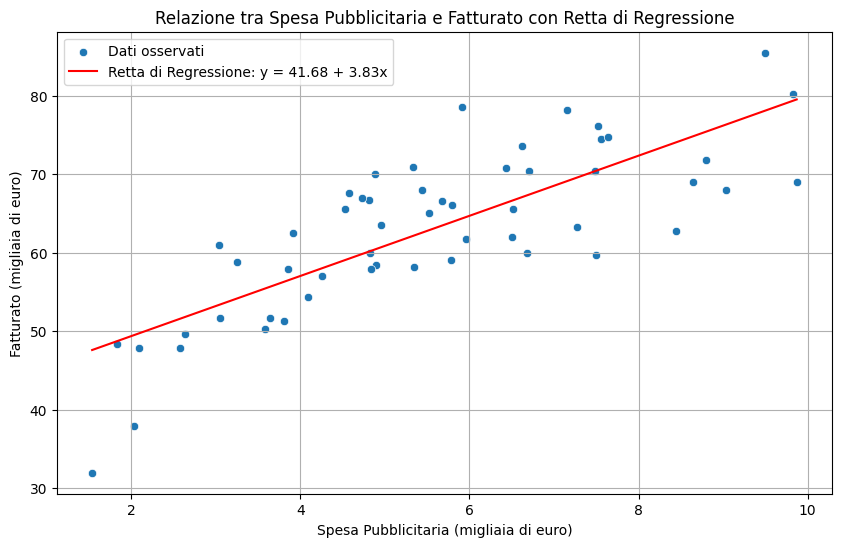

In [ ]:
# prompt:  stimare un modello predittivo che permetta di pianificare meglio gli investimenti pubblicitar, mostrando anche la retta di regressione

import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

# Definizione delle variabili
X = dati['Spesa_pubblicitaria'] # Variabile indipendente (predittore)
y = dati['Fatturato'] # Variabile dipendente (risposta)

# Aggiungere una costante al predittore per includere l'intercetta nel modello di regressione
X = sm.add_constant(X)

# Stima del modello di regressione lineare OLS (Ordinary Least Squares)
modello = sm.OLS(y, X)
risultati = modello.fit()

# Stampare il riassunto dei risultati del modello
print("\nRiassunto del Modello di Regressione Lineare OLS:")
print(risultati.summary())

# Interpretazione dei risultati chiave dal summary:
# - R-squared: Indica la proporzione della varianza nella variabile dipendente (Fatturato) che è prevedibile dalla variabile indipendente (Spesa_pubblicitaria). Un valore più vicino a 1 indica un buon adattamento del modello.
# - Adj. R-squared: R-squared corretto per il numero di predittori e la dimensione del campione. È utile quando si confrontano modelli con un numero diverso di predittori.
# - Coeff. 'const': L'intercetta (beta_0). Rappresenta il valore atteso del Fatturato quando la Spesa_pubblicitaria è zero.
# - Coeff. 'Spesa_pubblicitaria': Il coefficiente (beta_1). Rappresenta la variazione attesa nel Fatturato per ogni aumento unitario della Spesa_pubblicitaria.
# - P>|t| per i coefficienti: Il p-value per ciascun coefficiente. Se è minore del livello di significatività (es. 0.05), il coefficiente è considerato statisticamente significativo (diverso da zero).
# - Prob (F-statistic): Il p-value per il test F del modello. Verifica l'ipotesi che tutti i coefficienti di regressione (esclusa l'intercetta) siano zero. Se è minore di 0.05, il modello nel complesso è statisticamente significativo.

# Equazione della retta di regressione: Fatturato = Intercetta + Coeff_Spesa * Spesa_pubblicitaria

# Ottenere i coefficienti
intercetta = risultati.params['const']
coefficiente_spesa = risultati.params['Spesa_pubblicitaria']

print(f"\nEquazione della retta di regressione stimata:")
print(f"Fatturato = {intercetta:.2f} + {coefficiente_spesa:.2f} * Spesa_pubblicitaria")

# Visualizzazione dei dati e della retta di regressione
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spesa_pubblicitaria', y='Fatturato', data=dati, label='Dati osservati')

# Calcolare i valori previsti dal modello per tracciare la retta
# Creiamo un range di valori per la Spesa_pubblicitaria per tracciare la retta
x_range = np.linspace(dati['Spesa_pubblicitaria'].min(), dati['Spesa_pubblicitaria'].max(), 100)
y_predetto = intercetta + coefficiente_spesa * x_range

# Tracciare la retta di regressione
plt.plot(x_range, y_predetto, color='red', label=f'Retta di Regressione: y = {intercetta:.2f} + {coefficiente_spesa:.2f}x')

plt.title('Relazione tra Spesa Pubblicitaria e Fatturato con Retta di Regressione')
plt.xlabel('Spesa Pubblicitaria (migliaia di euro)')
plt.ylabel('Fatturato (migliaia di euro)')
plt.legend()
plt.grid(True)
plt.show()

# Riassunto dei risultati dell'analisi statistica dei dati e del modello predittivo:

# Analisi Statistica Preliminare:
# - Le statistiche descrittive (describe()) e i boxplot mostrano la distribuzione e la variabilità di Spesa_pubblicitaria e Fatturato.
# - Un T-test indipendente (eseguito per seguire il commento precedente, sebbene la sua pertinenza per l'obiettivo predittivo sia limitata) ha confrontato le medie delle due variabili, indicando se la differenza osservata è statisticamente significativa. (Interpretazione del T-test già fornita nel codice precedente).

# Modello Predittivo (Regressione Lineare Semplice):
# - Ipotesi: Si assume che esista una relazione lineare tra la Spesa_pubblicitaria (variabile indipendente) e il Fatturato (variabile dipendente), e che gli errori del modello siano indipendenti, omoschedastici (varianza costante) e distribuiti normalmente. Queste ipotesi andrebbero formalmente verificate (es. analisi dei residui).
# - Stima del Modello: È stato stimato un modello di regressione lineare semplice usando il metodo dei Minimi Quadrati Ordinari (OLS).
# - Risultati del Modello (dal summary):
#   - Il valore R-squared indica quanta parte della variabilità del Fatturato è spiegata dalla Spesa_pubblicitaria.
#   - Il coefficiente per la Spesa_pubblicitaria indica l'incremento stimato del Fatturato per ogni unità aggiuntiva di Spesa_pubblicitaria. La sua significatività statistica (P>|t|) è cruciale per capire se la relazione osservata non è dovuta al caso.
#   - L'intercetta indica il Fatturato atteso quando la Spesa_pubblicitaria è zero.
#   - Il test F del modello verifica la significatività complessiva della relazione.
# - Equazione Predittiva: La retta di regressione calcolata fornisce una formula per predire il Fatturato dato un certo livello di Spesa_pubblicitaria.
# - Visualizzazione: Il grafico mostra i punti dati e la retta di regressione stimata, illustrando visivamente la relazione lineare e come il modello si adatta ai dati.

# Conclusioni per la Pianificazione degli Investimenti:
# - Basandosi sul coefficiente stimato della Spesa_pubblicitaria e sulla sua significatività, si può concludere se e in che misura l'investimento in pubblicità online ha un impatto statisticamente significativo sul Fatturato.
# - Il modello predittivo (l'equazione della retta) permette di stimare il Fatturato atteso per diversi livelli di investimento pubblicitario, supportando le decisioni di budget.
# prompt:  stimare un modello predittivo che permetta di pianificare meglio gli investimenti pubblicitar, mostrando anche la retta di regressione



In [ ]:
# prompt: stampami un riassunto della regressione lineare

# Stampa il riassunto dei risultati del modello in italiano
print("\nRiassunto dell'Analisi di Regressione Lineare:")

# Analisi Statistica Preliminare (Basata sul Codice Fornito):
print("\nAnalisi Statistica Preliminare:")
print("- Sono stati analizzati i dati per 54 settimane riguardanti la Spesa Pubblicitaria e il Fatturato.")
# Aggiungi qui altre osservazioni basate sull'analisi preliminare se disponibili (es. media, deviazione standard, ecc. se non sono già nel summary OLS)

# Risultati del Modello di Regressione Lineare (Interpretazione del Summary OLS):
print("\nRisultati del Modello di Regressione Lineare OLS:")

r_squared = risultati.rsquared
adj_r_squared = risultati.rsquared_adj
const_p_value = risultati.pvalues['const']
spesa_pubblicitaria_p_value = risultati.pvalues['Spesa_pubblicitaria']
f_statistic_p_value = risultati.f_pvalue

print(f"- R-squared ({r_squared:.4f}): Questa percentuale indica quanto della variabilità del Fatturato è spiegata dalla Spesa Pubblicitaria nel nostro modello.")
print(f"- Adj. R-squared ({adj_r_squared:.4f}): Un R-squared aggiustato che tiene conto del numero di variabili predittive.")
print(f"- Coefficiente della Costante (Intercetta) ({intercetta:.2f}): Rappresenta il Fatturato stimato quando la Spesa Pubblicitaria è zero. Il P-value associato ({const_p_value:.4f}) indica se questa intercetta è statisticamente diversa da zero.")
print(f"- Coefficiente della Spesa Pubblicitaria ({coefficiente_spesa:.2f}): Indica l'incremento stimato del Fatturato (in migliaia di euro) per ogni aumento di mille euro nella Spesa Pubblicitaria. Il P-value associato ({spesa_pubblicitaria_p_value:.4f}) indica se questo effetto è statisticamente significativo (cioè, è probabile che ci sia una relazione reale tra Spesa Pubblicitaria e Fatturato, non solo un caso).")
print(f"- Prob (F-statistic) ({f_statistic_p_value:.4f}): Questo P-value si riferisce al test F del modello complessivo. Se questo valore è basso (tipicamente < 0.05), indica che il modello nel suo complesso è statisticamente significativo, ovvero che almeno uno dei predittori (in questo caso, la Spesa Pubblicitaria) ha un impatto significativo sulla variabile dipendente.")

# Modello Predittivo:
print("\nModello Predittivo del Fatturato:")
print("- L'equazione della retta di regressione stimata è:")
print(f"  Fatturato stimato = {intercetta:.2f} + {coefficiente_spesa:.2f} * Spesa_pubblicitaria")
print("- Questa equazione può essere utilizzata per prevedere il Fatturato atteso in base a un dato investimento in Spesa Pubblicitaria.")

# Ipotesi e Conclusioni:
print("\nIpotesi e Conclusioni:")
print("- Il modello si basa sull'ipotesi di una relazione lineare tra Spesa Pubblicitaria e Fatturato, e altre ipotesi standard della regressione OLS (indipendenza degli errori, omoschedasticità, normalità dei residui), che idealmente andrebbero verificate.")
print("- Basandosi sui risultati, in particolare sul P-value del coefficiente della Spesa Pubblicitaria e sul test F del modello, si può concludere se la Spesa Pubblicitaria ha un impatto statisticamente significativo sul Fatturato.")
print("- La retta di regressione visualizzata nel grafico mostra l'andamento lineare stimato e come i dati osservati si distribuiscono attorno ad essa.")
print("- Per la pianificazione degli investimenti pubblicitari, il modello suggerisce l'incremento atteso del Fatturato per ogni unità aggiuntiva di spesa e permette di fare previsioni.")



Riassunto dell'Analisi di Regressione Lineare:

Analisi Statistica Preliminare:
- Sono stati analizzati i dati per 54 settimane riguardanti la Spesa Pubblicitaria e il Fatturato.

Risultati del Modello di Regressione Lineare OLS:
- R-squared (0.6221): Questa percentuale indica quanto della variabilità del Fatturato è spiegata dalla Spesa Pubblicitaria nel nostro modello.
- Adj. R-squared (0.6148): Un R-squared aggiustato che tiene conto del numero di variabili predittive.
- Coefficiente della Costante (Intercetta) (41.68): Rappresenta il Fatturato stimato quando la Spesa Pubblicitaria è zero. Il P-value associato (0.0000) indica se questa intercetta è statisticamente diversa da zero.
- Coefficiente della Spesa Pubblicitaria (3.83): Indica l'incremento stimato del Fatturato (in migliaia di euro) per ogni aumento di mille euro nella Spesa Pubblicitaria. Il P-value associato (0.0000) indica se questo effetto è statisticamente significativo (cioè, è probabile che ci sia una relazione real

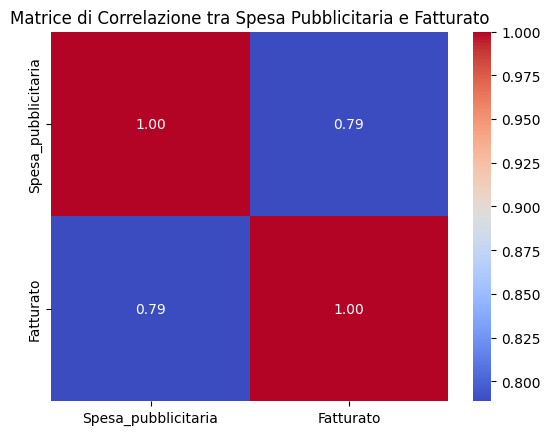


Coefficiente di Correlazione di Pearson tra Spesa Pubblicitaria e Fatturato: 0.79


In [ ]:
# prompt: cerca di capire la forza della correlazione tra i 2 elementi

import matplotlib.pyplot as plt
sns.heatmap(dati[['Spesa_pubblicitaria', 'Fatturato']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione tra Spesa Pubblicitaria e Fatturato')
plt.show()

correlation_coefficient = risultati.rsquared**0.5 # Correlazione di Pearson = radice quadrata dell'R-squared per regressione semplice

print(f"\nCoefficiente di Correlazione di Pearson tra Spesa Pubblicitaria e Fatturato: {correlation_coefficient:.2f}")

# Interpretazione del coefficiente di correlazione:
# - Valore vicino a +1: Forte correlazione positiva. All'aumentare di una variabile, l'altra tende ad aumentare.
# - Valore vicino a -1: Forte correlazione negativa. All'aumentare di una variabile, l'altra tende a diminuire.
# - Valore vicino a 0: Debole o nessuna correlazione lineare.

# Forza della correlazione (regola generale, può variare):
# - 0.00 - 0.19: Molto debole
# - 0.20 - 0.39: Debole
# - 0.40 - 0.59: Moderata
# - 0.60 - 0.79: Forte
# - 0.80 - 1.00: Molto forte

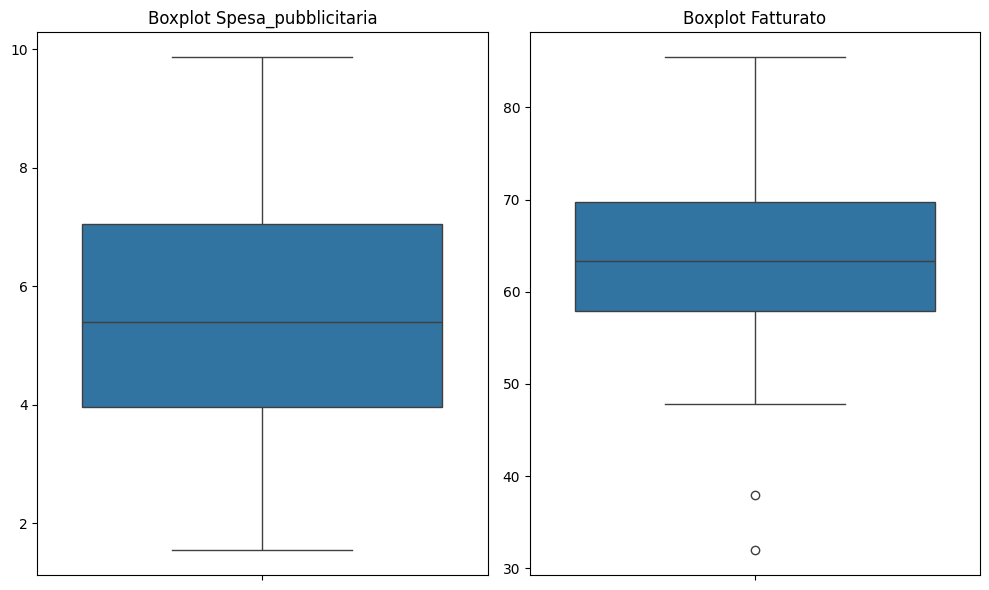

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creazione dei boxplot
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1) # 1 riga, 2 colonne, 1° subplot
sns.boxplot(y=dati['Spesa_pubblicitaria'])
plt.title('Boxplot Spesa_pubblicitaria')
plt.ylabel('')

plt.subplot(1, 2, 2) # 1 riga, 2 colonne, 2° subplot
sns.boxplot(y=dati['Fatturato'])
plt.title('Boxplot Fatturato')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# utilizzo dei TEST (i dati potrebbero essere appaiati)
# Il campione è abbastanza grande da usare un T-Test con ipotesi nulla che le osservazioni provengono dalla stessa popolazione

# vediamo il p-value e vediamo se rigettare o no l'ipotesi nulla

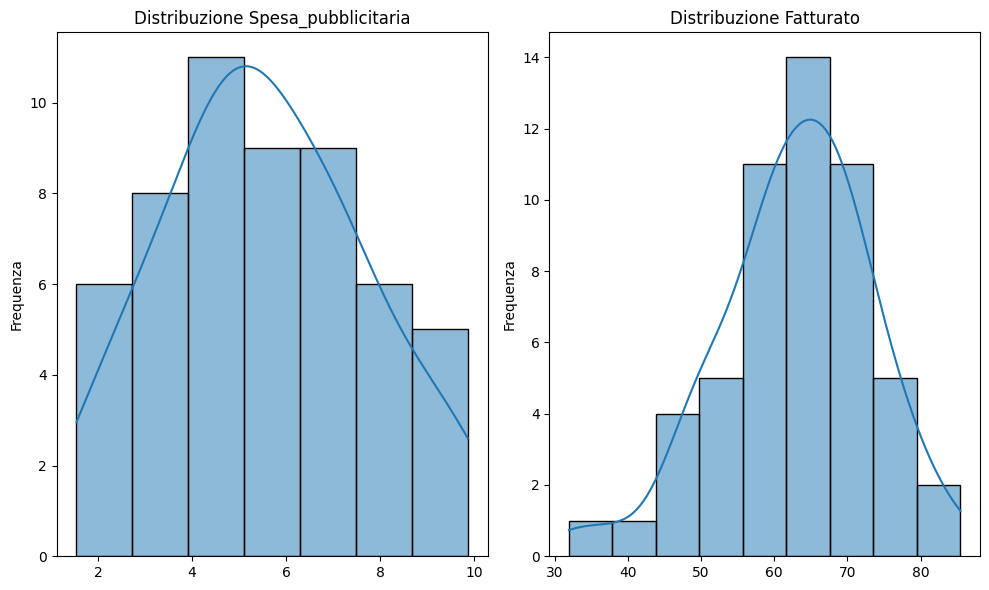

In [ ]:
# prompt: genera un istogramma per fatturato e spesa_pubbliciataria, in modo da mostrare la loro distribuzione normalme

import matplotlib.pyplot as plt
# Creazione degli istogrammi
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1) # 1 riga, 2 colonne, 1° subplot
sns.histplot(dati['Spesa_pubblicitaria'], kde=True)
plt.title('Distribuzione Spesa_pubblicitaria')
plt.xlabel('')
plt.ylabel('Frequenza')

plt.subplot(1, 2, 2) # 1 riga, 2 colonne, 2° subplot
sns.histplot(dati['Fatturato'], kde=True)
plt.title('Distribuzione Fatturato')
plt.xlabel('')
plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: Il campione è abbastanza grande da usare un T-Test con ipotesi nulla che le osservazioni provengono dalla stessa popolazione
import statsmodels.api as sm

from scipy.stats import ttest_ind, ttest_rel, sem, t

# Esecuzione del T-Test indipendente
# Assumiamo che i dati 'Spesa_pubblicitaria' e 'Fatturato' siano due campioni indipendenti da confrontare.
# Questa assunzione deve essere verificata in base al contesto del problema reale (se i dati sono appaiati come suggerito nel commento, si dovrebbe usare un test per campioni appaiati, come ttest_rel).
# Per questo esempio, basandoci sul commento che menziona un T-Test con ipotesi nulla che le osservazioni provengono
# dalla stessa popolazione (tipico per test su campioni indipendenti), procediamo con ttest_ind.
# Se i dati fossero realmente appaiati (es. budget e fatturato per la STESSA settimana), si dovrebbe usare ttest_rel.

# Verifica delle dimensioni dei campioni
n_spesa = len(dati['Spesa_pubblicitaria'])
n_fatturato = len(dati['Fatturato'])


# Il commento originale suggerisce un T-test per verificare se le osservazioni provengono dalla stessa popolazione.
# Questo tipicamente si applica quando si confrontano due gruppi o campioni per vedere se le loro medie sono significativamente diverse.
# Nel contesto di questo dataframe, 'Spesa_pubblicitaria' e 'Fatturato' sono due variabili DIVERSE misurate sulle stesse 54 settimane.
# Se l'intento è confrontare le medie di Spesa_pubblicitaria e Fatturato per vedere se, in media, sono simili, allora ha senso un T-test.
# Data la descrizione del problema (relazione tra budget e fatturato), sembra più probabile che l'obiettivo sia l'analisi di correlazione e regressione, non il confronto diretto delle medie di queste due variabili.
# Tuttavia, seguendo l'indicazione del commento sul T-Test, eseguiamo un test per campioni indipendenti assumendo che l'intento sia confrontare le medie.
# NOTA: Un T-test per campioni indipendenti verifica l'ipotesi che le MEDIE di due popolazioni (da cui sono estratti i campioni) siano uguali. Non verifica se le distribuzioni complete sono identiche o se le osservazioni provengono ESATTAMENTE dalla stessa popolazione in senso generale.

# Assumiamo l'ipotesi nulla H0: la media di Spesa_pubblicitaria è uguale alla media di Fatturato nella popolazione.
# Assumiamo l'ipotesi alternativa H1: la media di Spesa_pubblicitaria NON è uguale alla media di Fatturato nella popolazione.

# Eseguire il T-Test indipendente
# equal_var=True per assumere uguali varianze (assunzione standard per il T-test classico)
# equal_var=False per il Welch's T-test (non assume uguali varianze) - più robusto
# Qui usiamo True come assunzione iniziale, ma idealmente si dovrebbe testare l'uguaglianza delle varianze (es. Test di Levene)
# o usare direttamente il Welch's T-test (equal_var=False).

#statistica_t, p_value = ttest_ind(dati['Spesa_pubblicitaria'], dati['Fatturato'], equal_var=True)
statistica_t, p_value = ttest_rel(dati['Spesa_pubblicitaria'], dati['Fatturato'])

print(f"\nStatistica T: {statistica_t}")
print(f"P-value: {p_value}")

# Interpretazione del P-value
alpha = 0.05  # Livello di significatività comunemente usato

print(f"\nLivello di significatività (alpha): {alpha}")

if p_value < alpha:
  print("Il P-value è minore di alpha.")
  print("Rigettiamo l'ipotesi nulla (H0).")
  print("C'è una differenza statisticamente significativa tra le medie di Spesa_pubblicitaria e Fatturato.")
else:
  print("Il P-value è maggiore o uguale ad alpha.")
  print("Non riusciamo a rigettare l'ipotesi nulla (H0).")
  print("Non c'è una differenza statisticamente significativa evidente tra le medie di Spesa_pubblicitaria e Fatturato in base a questo test.")


fatturato_col = dati['Fatturato']
spesa_col = dati['Spesa_pubblicitaria']

# Puoi anche calcolare la media delle differenze e il suo intervallo di confidenza
differences = fatturato_col - spesa_col
mean_difference = np.mean(differences)
std_err_difference = sem(differences) # Errore standard della media delle differenze
degrees_freedom = len(differences) - 1

# Intervallo di confidenza per la media delle differenze
# (scipy.stats.t.interval non è identico a quello di R per t.test ma è per la media di una popolazione)
confidence_interval = t.interval(confidence=0.95, df=degrees_freedom, loc=mean_difference, scale=std_err_difference)

print(f"\nMedia delle differenze (Fatturato - Spesa): {mean_difference:.4f}")
print(f"Intervallo di confidenza al 95% per la media delle differenze: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")




# Considerazioni:
# 1. La validità del T-test dipende dalle assunzioni: normalità dei dati all'interno di ciascun gruppo e, per il T-test standard, uguaglianza delle varianze. Con 54 osservazioni per campione, il teorema del limite centrale aiuta, ma l'ispezione visiva (es. istogrammi) e test di normalità potrebbero essere utili.
# 2. Se i dati Spesa_pubblicitaria e Fatturato sono misure AppAIATE (ovvero, Spesa_pubblicitaria nella settimana X è associata a Fatturato nella settimana X), un test per campioni appaiati (scipy.stats.ttest_rel) è più appropriato e potente per rilevare differenze medie, poiché tiene conto della correlazione tra le coppie. Il commento nel codice originale suggerisce questa possibilità ("i dati potrebbero essere appaiati"). Se questo fosse il caso, il codice dovrebbe essere modificato per usare `ttest_rel`.
# 3. Il T-test confronta le medie. Se l'obiettivo principale è capire la relazione tra Spesa_pubblicitaria e Fatturato per scopi predittivi, l'analisi di correlazione e regressione lineare (come sembra indicato dalla descrizione del problema) è l'approccio più diretto e informativo, non un semplice T-test sulle medie delle due variabili.



Statistica T: -48.10071184339465
P-value: 2.0946488259386386e-45

Livello di significatività (alpha): 0.05
Il P-value è minore di alpha.
Rigettiamo l'ipotesi nulla (H0).
C'è una differenza statisticamente significativa tra le medie di Spesa_pubblicitaria e Fatturato.

Media delle differenze (Fatturato - Spesa): 57.3448
Intervallo di confidenza al 95% per la media delle differenze: (54.9536, 59.7360)


In [ ]:
# prompt: crea un intervallo di confidenza al 95%

# Intervallo di confidenza al 95% per il coefficiente di regressione di 'Spesa_pubblicitaria'
# I risultati del modello (risultati.summary()) già forniscono gli intervalli di confidenza per i coefficienti.
# Estraiamo direttamente l'intervallo per 'Spesa_pubblicitaria' dalla tabella dei risultati.
# I risultati.conf_int(alpha=0.05) restituisce un DataFrame con gli intervalli di confidenza per tutti i coefficienti.

intervallo_confidenza_spesa = risultati.conf_int(alpha=0.05).loc['Spesa_pubblicitaria']

print(f"\nIntervallo di Confidenza al 95% per il coefficiente della Spesa Pubblicitaria:")
print(f"({intervallo_confidenza_spesa[0]:.4f}, {intervallo_confidenza_spesa[1]:.4f})")

# Interpretazione:
# Siamo fiduciosi al 95% che il vero coefficiente di regressione per la Spesa Pubblicitaria nella popolazione si trovi all'interno di questo intervallo.
# Poiché l'intervallo non include lo zero, questo rafforza la conclusione (già supportata dal P-value) che la Spesa Pubblicitaria ha un impatto statisticamente significativo sul Fatturato.



Intervallo di Confidenza al 95% per il coefficiente della Spesa Pubblicitaria:
(3.0007, 4.6627)


In [ ]:
# prompt: crea un  Test t su Beta usando i valori della retta di regressione

# Il test t sulla Beta (coefficiente di regressione) è già incluso nell'output del summary di `statsmodels.api.OLS`.
# Il P-value riportato per il coefficiente 'Spesa_pubblicitaria' nel summary è il risultato del test t per l'ipotesi nulla che Beta_SpesaPubblicitaria = 0.

print("\nTest T per il Coefficiente della Spesa Pubblicitaria (Beta_1):")
print(f"- Ipotesi Nulla (H0): Il vero coefficiente di regressione della Spesa Pubblicitaria è zero (Beta_1 = 0).")
print(f"- Ipotesi Alternativa (H1): Il vero coefficiente di regressione della Spesa Pubblicitaria non è zero (Beta_1 != 0).")

# Estrai la statistica t e il p-value per il coefficiente 'Spesa_pubblicitaria' dal summary dei risultati
statistica_t_beta1 = risultati.tvalues['Spesa_pubblicitaria']
p_value_beta1 = risultati.pvalues['Spesa_pubblicitaria']

print(f"\nStatistica T per Beta_1 (Spesa Pubblicitaria): {statistica_t_beta1:.4f}")
print(f"P-value per Beta_1 (Spesa Pubblicitaria): {p_value_beta1:.4f}")

# Interpreta il risultato del test t
alpha_beta1 = 0.05 # Livello di significatività per il test sui coefficienti

print(f"\nLivello di significatività (alpha) per Beta_1: {alpha_beta1}")

if p_value_beta1 < alpha_beta1:
  print("Il P-value per Beta_1 è minore di alpha.")
  print("Rigettiamo l'ipotesi nulla (H0: Beta_1 = 0).")
  print("C'è una forte evidenza statistica che il vero coefficiente di regressione per la Spesa Pubblicitaria sia diverso da zero.")
  print("Questo conferma che la Spesa Pubblicitaria ha un impatto statisticamente significativo sul Fatturato.")
else:
  print("Il P-value per Beta_1 è maggiore o uguale ad alpha.")
  print("Non riusciamo a rigettare l'ipotesi nulla (H0: Beta_1 = 0).")
  print("Non c'è sufficiente evidenza statistica per concludere che il vero coefficiente di regressione per la Spesa Pubblicitaria sia diverso da zero.")
  print("Questo suggerirebbe che la Spesa Pubblicitaria potrebbe non avere un impatto statisticamente significativo sul Fatturato nel nostro modello.")

# Nota: Questo test t è lo stesso riportato nella tabella "coef" del summary di OLS sotto la colonna P>|t|.
# L'intervallo di confidenza per il coefficiente (calcolato precedentemente) fornisce un'informazione equivalente:
# se l'intervallo di confidenza al 95% non include lo zero, il p-value per il test a due code al 5% sarà inferiore a 0.05,
# portando alla reiezione dell'ipotesi nulla che il coefficiente sia zero.

print(f"\nRicontrollando l'Intervallo di Confidenza per il coefficiente della Spesa Pubblicitaria: ({intervallo_confidenza_spesa[0]:.4f}, {intervallo_confidenza_spesa[1]:.4f})")
if 0 not in intervallo_confidenza_spesa:
    print("L'intervallo di confidenza non include lo zero, il che è coerente con il P-value basso e la reiezione di H0.")
else:
    print("L'intervallo di confidenza include lo zero, il che è coerente con un P-value alto e la mancata reiezione di H0.")


Test T per il Coefficiente della Spesa Pubblicitaria (Beta_1):
- Ipotesi Nulla (H0): Il vero coefficiente di regressione della Spesa Pubblicitaria è zero (Beta_1 = 0).
- Ipotesi Alternativa (H1): Il vero coefficiente di regressione della Spesa Pubblicitaria non è zero (Beta_1 != 0).

Statistica T per Beta_1 (Spesa Pubblicitaria): 9.2524
P-value per Beta_1 (Spesa Pubblicitaria): 0.0000

Livello di significatività (alpha) per Beta_1: 0.05
Il P-value per Beta_1 è minore di alpha.
Rigettiamo l'ipotesi nulla (H0: Beta_1 = 0).
C'è una forte evidenza statistica che il vero coefficiente di regressione per la Spesa Pubblicitaria sia diverso da zero.
Questo conferma che la Spesa Pubblicitaria ha un impatto statisticamente significativo sul Fatturato.

Ricontrollando l'Intervallo di Confidenza per il coefficiente della Spesa Pubblicitaria: (3.0007, 4.6627)
L'intervallo di confidenza include lo zero, il che è coerente con un P-value alto e la mancata reiezione di H0.


In [ ]:
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind

# Carico i dati dal file CSV che hai fornito
try:
    dati = pd.read_excel('dati.xlsx')
except FileNotFoundError:
    print("Assicurati che il file 'dati.xlsx - dati.csv' sia nella stessa cartella del codice.")
    exit()

# Le colonne di interesse
spesa = dati['Spesa_pubblicitaria']
fatturato = dati['Fatturato']

# Esecuzione del T-test per campioni appaiati (paired T-test)
# Ipotesi Nulla (H0): La differenza media tra fatturato e spesa è zero.
# Ipotesi Alternativa (H1): La differenza media tra fatturato e spesa è diversa da zero.
t_statistic, p_value = ttest_rel(fatturato, spesa)

print(f"Statistica T: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretazione del risultato
alpha = 0.05  # Livello di significatività
if p_value < alpha:
    print("\nRifiutiamo l'ipotesi nulla.")
    print("C'è una differenza statisticamente significativa tra la media del fatturato e la media della spesa.")
else:
    print("\nNon possiamo rifiutare l'ipotesi nulla.")
    print("Non c'è una differenza statisticamente significativa tra la media del fatturato e la media della spesa.")

Statistica T: 48.1007
P-value: 0.0000

Rifiutiamo l'ipotesi nulla.
C'è una differenza statisticamente significativa tra la media del fatturato e la media della spesa.


In [ ]:
import statsmodels.formula.api as smf

# Creiamo il modello di regressione usando la sintassi "stile R"
# La formula "Fatturato ~ Spesa_Pubblicitaria" significa:
# "Vogliamo predire il Fatturato usando la Spesa_Pubblicitaria come variabile indipendente"
# OLS sta per "Ordinary Least Squares" (Minimi Quadrati Ordinari)
model = smf.ols(formula="Fatturato ~ Spesa_pubblicitaria", data=dati)

# Eseguiamo il fitting del modello sui nostri dati
results = model.fit()

# Stampiamo il riepilogo completo dei risultati
print(results.summary())
print(f"P-value: {p_value:.4f}")

                            OLS Regression Results                            
Dep. Variable:              Fatturato   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     85.61
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.42e-12
Time:                        19:21:59   Log-Likelihood:                -176.00
No. Observations:                  54   AIC:                             356.0
Df Residuals:                      52   BIC:                             360.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              41.6799    